In [1]:
!pip install graphviz

Looking in indexes: https://cosmo-pypi.phys.ethz.ch/simple/, https://pypi.org/simple/
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
import pandas as pd

# read some data
beer_data = pd.read_csv("beers.csv")
beer_data.head(5)

alcohol_content  bitterness  darkness  fruitiness  is_yummy
0         3.739295    0.422503  0.989463    0.215791         0
1         4.207849    0.841668  0.928626    0.380420         0
2         4.709494    0.322037  5.374682    0.145231         1
3         4.684743    0.434315  4.072805    0.191321         1
4         4.148710    0.570586  1.461568    0.260218         0

In [5]:
# all columns up to the last one:
input_features = beer_data.iloc[:, :-1]

# only the last column:
labels = beer_data.iloc[:, -1]

print(input_features.head(5))
print()
print(labels.head(5))

   alcohol_content  bitterness  darkness  fruitiness
0         3.739295    0.422503  0.989463    0.215791
1         4.207849    0.841668  0.928626    0.380420
2         4.709494    0.322037  5.374682    0.145231
3         4.684743    0.434315  4.072805    0.191321
4         4.148710    0.570586  1.461568    0.260218

0    0
1    0
2    1
3    1
4    0
Name: is_yummy, dtype: int64


(225,)
209


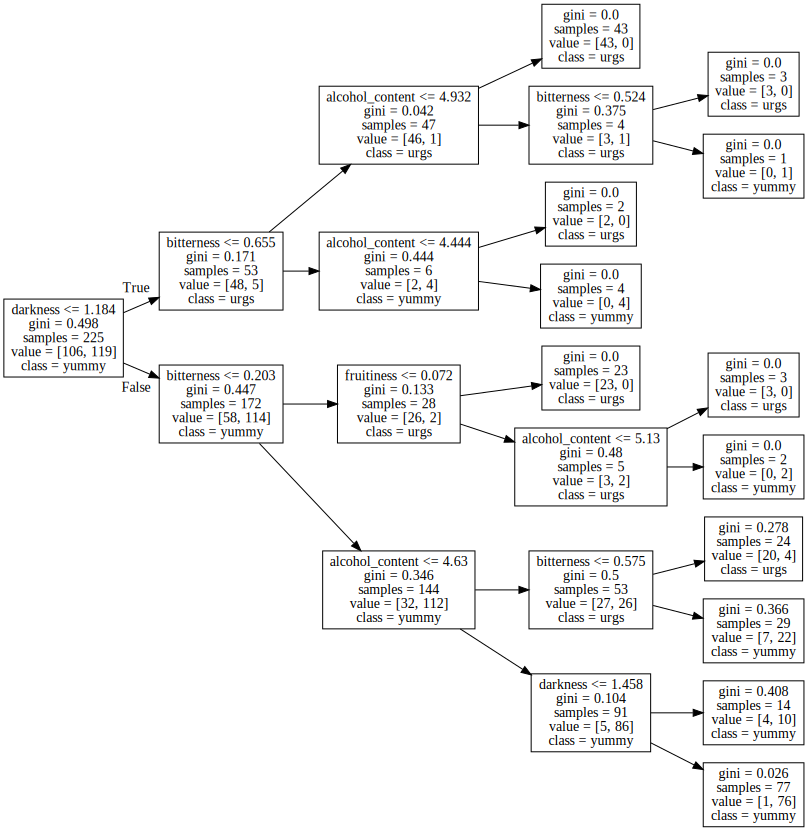

In [19]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(max_depth=4)
classifier.fit(input_features, labels)

predicted_labels = classifier.predict(input_features)
print(labels.shape)
print(sum(predicted_labels == labels))

from IPython.display import SVG
from sklearn import tree
from graphviz import Source
graph = Source( tree.export_graphviz(classifier, out_file=None, rotate=True, feature_names=beer_data.columns[:-1], class_names=["urgs", "yummy"]))
SVG(graph.pipe(format='svg'), )

In [20]:
from sklearn.cluster import KMeans

In [26]:
clf = KMeans(n_clusters=3)
clf.fit(input_features)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [27]:
clf.n_clusters

3

In [30]:
from sklearn.manifold import TSNE

x = TSNE()
y = x.fit_transform(input_features)

In [32]:
import matplotlib.pyplot as plt

In [38]:
colors = ["rg"[i] for i in labels]

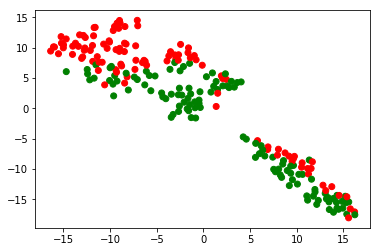

In [40]:
plt.scatter(y[:, 0], y[:, 1], color=colors)

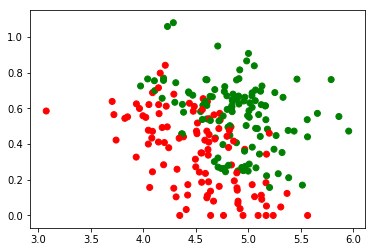

In [43]:
xv = beer_data["alcohol_content"]
yv = beer_data["bitterness"]
colors
plt.scatter(xv, yv, color=colors)

## SVC 2D plots

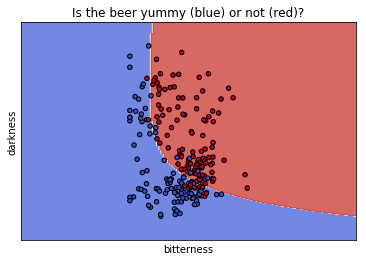

In [5]:
import pandas as pd
beer_data = pd.read_csv("beers.csv")
input_features = beer_data.iloc[:, :-1]
labels = beer_data.iloc[:, -1]
# pick 2 features from `input_features.columns`
input_features_names = ["bitterness", "darkness"]
X = input_features[input_features_names]
y = labels

'''Source: https://scikit-learn.org/stable/auto_examples/svm/plot_iris.html#sphx-glr-auto-examples-svm-plot-iris-py
'''
import matplotlib.pyplot as plt
import numpy as np

def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out



from sklearn import svm

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = (
    svm.SVC(kernel='linear', C=C),
    svm.LinearSVC(C=C),
    svm.SVC(kernel='rbf', gamma=0.7, C=C),
    svm.SVC(kernel='poly', degree=3, C=C),
)
models = [clf.fit(X, y) for clf in models]

# title for the plots
titles = (
    'SVC with linear kernel',
    'LinearSVC (linear kernel)',
    'SVC with RBF kernel',
    'SVC with polynomial (degree 3) kernel',
)

models = models[-1:]
titles = ('Is the beer yummy (blue) or not (red)?',)

# Set-up 2x2 grid for plotting.
#fig, sub = plt.subplots(2, 2)
fig, sub = plt.subplots(1, 1)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X.iloc[:, 0], X.iloc[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten() if hasattr(sub, 'flatten') else [sub]):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel(input_features_names[0])
    ax.set_ylabel(input_features_names[1])
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)